 # **Diabetes Prediction Using Machine Learning.**
 **Project Description:**

 
This project involves analyzing a diabetes dataset to uncover key patterns and trends, followed by building machine learning models to predict the likelihood of diabetes in individuals. The process includes data cleaning, exploratory data analysis (EDA), feature engineering, and model evaluation using metrics like accuracy and F1-score. The goal is to create an accurate and interpretable model that aids healthcare providers in identifying at-risk patients.

In [48]:
# Importing important Libraries
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings; warnings.filterwarnings("ignore")
 

In [49]:
# Importing data from csv file.
df = pd.read_csv('Diabetes.csv')
# Dataset is defined as df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Exploring data for cleaning , Removing outliers and understanding data distribution.**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 total columns and there is no categorical variable.

In [51]:
# Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in any variable or column.

In [52]:
# Checking Statistics Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



The dataset contains 768 records with key features such as glucose, BMI, and age. There are some zero values in critical columns like glucose, insulin, and BMI, which may represent missing data. Approximately 35% of individuals have diabetes, indicated by the outcome variable.

**1.4 Renaming the coulmns of Data Frame (2,3,6)**

In [53]:
# Renamed the BloodPressure column to BP
df.rename(columns={'BloodPressure':'BP'},inplace=True)

In [54]:
# Renamed the DiabetesPedigreeFunction column to DPF
df.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [55]:
# Renamed the SkinThickness Column to ST 
df.rename(columns={'SkinThickness':'ST'},inplace=True)

**1.5 - Understanding the relationship between variables.**

In [56]:
# sns.pairplot(data=df)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BP           768 non-null    int64  
 3   ST           768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DPF          768 non-null    float64
 7   Age          768 non-null    int64  
 8   Outcome      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

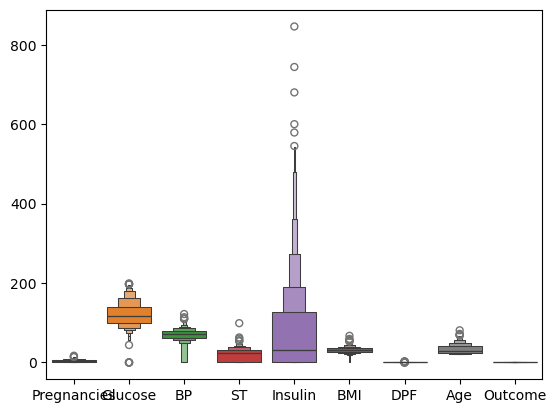

In [58]:
# Checking outliers in Dataset by Visualization  
sns.boxenplot(df)

In [59]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Example: Detect outliers for a single variable
outliers_BP = detect_outliers_iqr(df, 'BP')
print(f"Number of outliers in 'BP': {len(outliers_BP)}")

print(outliers_BP)
Q1 = df['BP'].quantile(0.25)
Q3 = df['BP'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['BP'] >= lower_bound) & (df['BP'] <= upper_bound)]

# Check the result
df

Number of outliers in 'BP': 45
     Pregnancies  Glucose   BP  ST  Insulin   BMI    DPF  Age  Outcome
7             10      115    0   0        0  35.3  0.134   29        0
15             7      100    0   0        0  30.0  0.484   32        1
18             1      103   30  38       83  43.3  0.183   33        0
43             9      171  110  24      240  45.4  0.721   54        1
49             7      105    0   0        0   0.0  0.305   24        0
60             2       84    0   0        0   0.0  0.304   21        0
78             0      131    0   0        0  43.2  0.270   26        1
81             2       74    0   0        0   0.0  0.102   22        0
84             5      137  108   0        0  48.8  0.227   37        1
106            1       96  122   0        0  22.4  0.207   27        0
125            1       88   30  42       99  55.0  0.496   26        1
172            2       87    0  23        0  28.9  0.773   25        0
177            0      129  110  46      130  6

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [61]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers for a single variable
outliers_Pregnancies = detect_outliers_iqr(df, 'Pregnancies')
print(f"Number of outliers in 'Pregnancies': {len(outliers_Pregnancies)}")

print(outliers_Pregnancies)

# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Check the result
df

Number of outliers in 'Pregnancies': 4
     Pregnancies  Glucose  BP  ST  Insulin   BMI    DPF  Age  Outcome
88            15      136  70  32      110  37.1  0.153   43        1
159           17      163  72  41      114  40.9  0.817   47        1
298           14      100  78  25      184  36.6  0.412   46        1
455           14      175  62  30        0  33.6  0.212   38        1


,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers for a single variable
outliers_Glucose= detect_outliers_iqr(df, 'Glucose')
print(f"Number of outliers in 'Glucose': {len(outliers_Glucose)}")

Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]

# Check the result
df

Number of outliers in 'Glucose': 5


,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers for a single variable
outliers_ST = detect_outliers_iqr(df, 'ST')
print(f"Number of outliers in 'ST': {len(outliers_ST)}")

Q1 = df['ST'].quantile(0.25)
Q3 = df['ST'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ST'] >= lower_bound) & (df['ST'] <= upper_bound)]

# Check the result
df

Number of outliers in 'ST': 1


,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [64]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers for a single variable
outliers_Insulin = detect_outliers_iqr(df, 'Insulin')
print(f"Number of outliers in 'Insulin': {len(outliers_Insulin)}")


Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

# Check the result
df

Number of outliers in 'Insulin': 26


,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [65]:
# Import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# df = sns.load_dataset('titanic')
x = df[['Age','Pregnancies','Glucose','Insulin','BP']]
y = df['Outcome']


from sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

models = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),DecisionTreeClassifier()]
model_names = ['LogisticRegression', 'KNN', 'Random Forest', 'SVM', 'DecisionTreeClassifier']

models_scores = []
for model,model_name in zip (models, model_names):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    models_scores.append([model_name,accuracy])

    sorted_models = sorted(models_scores,key=lambda x: x[1], reverse=True)
    for model in sorted_models:
        print('Accuracy Score:', f'{model[0]} : {model[1]:.2f}')

Accuracy Score: LogisticRegression : 0.72
Accuracy Score: LogisticRegression : 0.72
Accuracy Score: KNN : 0.72
Accuracy Score: Random Forest : 0.76
Accuracy Score: LogisticRegression : 0.72
Accuracy Score: KNN : 0.72
Accuracy Score: SVM : 0.77
Accuracy Score: Random Forest : 0.76
Accuracy Score: LogisticRegression : 0.72
Accuracy Score: KNN : 0.72
Accuracy Score: SVM : 0.77
Accuracy Score: Random Forest : 0.76
Accuracy Score: LogisticRegression : 0.72
Accuracy Score: KNN : 0.72
Accuracy Score: DecisionTreeClassifier : 0.66


In [70]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preparing the dataset


# Splitting the dataset into features (X) and target (y)
X = df[['Age','Pregnancies','Glucose','Insulin','BP']]
y = df['Outcome']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creating the logistic regression model
logreg = LogisticRegression()

# Training the model
logreg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report for detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix to see true positive, true negative, etc.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 81.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        94
           1       0.73      0.63      0.68        43

    accuracy                           0.81       137
   macro avg       0.78      0.76      0.77       137
weighted avg       0.81      0.81      0.81       137


Confusion Matrix:
[[84 10]
 [16 27]]
